# Data Mining - IEE 520 Final Project 

## Submitted to - Dr. Runger

## Submitted by - Arvind Ramkumar - ASU ID - 1213469749 

### Importing Package 

In [479]:
import pandas as pd
import numpy as np

### Initially we split the training set into train and test to validate the model. Once we confirm the model, we fit the entire training set to estimate the test data.   

In [480]:
# Load Data 

maindata = pd.read_csv("train.csv")

maindata.shape

(2500, 67)

In [481]:
maindata.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,y
0,27,1,1,1,A,18,3,1,28,119.9,...,1,0,0,0,0,1,Mp,NPT,1,-1
1,30,0,1,1,B,18,13,3,19,86.7,...,1,0,0,0,0,0,Mm,NST,1,-1
2,37,0,1,1,A,1,3,14,33,174.0,...,1,0,0,0,0,0,Mp,NPT,0,1
3,29,0,1,1,C,14,9,3,29,8.8,...,0,0,0,0,0,0,Mp,NST,0,-1
4,33,1,1,0,E,2,15,12,39,55.0,...,1,0,0,0,0,0,Mm,NST,1,-1


## Class Distribution 

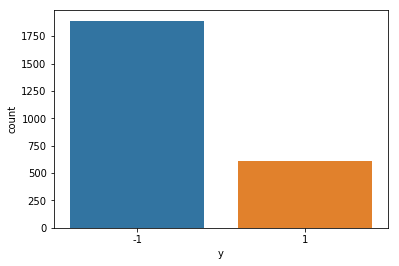

In [482]:
# Now lets check the class distributions

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

sns.countplot("y",data=maindata)

There is a clear class imbalance. We resample by the upsampling method to deal with this. We choose upsample over downsample, because there is a high chance of loosing all the important data. So upsample is preferred.




We split the existing dataset into train and test. we upsample the train data to handle the class imbalance and we measure the model based on the test set. 

## Handling Categorical Variables 

In [483]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

maindata['x5'] = le.fit_transform(maindata['x5'])
maindata['x13'] = le.fit_transform(maindata['x13'])
maindata['x64'] = le.fit_transform(maindata['x64'])
maindata['x65'] = le.fit_transform(maindata['x65'])

maindata.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,y
0,27,1,1,1,0,18,3,1,28,119.9,...,1,0,0,0,0,1,3,0,1,-1
1,30,0,1,1,1,18,13,3,19,86.7,...,1,0,0,0,0,0,2,1,1,-1
2,37,0,1,1,0,1,3,14,33,174.0,...,1,0,0,0,0,0,3,0,0,1
3,29,0,1,1,2,14,9,3,29,8.8,...,0,0,0,0,0,0,3,1,0,-1
4,33,1,1,0,4,2,15,12,39,55.0,...,1,0,0,0,0,0,2,1,1,-1


## Split the Entire Set into Test and Train  

In [484]:
# Splitting the Train and Test Data 

from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(maindata, test_size = 0.2, random_state = 123)

In [485]:
#list(data_test)

## Data Assigning for Test Data 

In [486]:
# Assign Data 

xtest = data_test.iloc[:,:-1]
ytest = data_test.iloc[:,66]

#xtest = xtest.drop(['y'], axis = 1)

In [487]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66
2386,29,0,1,1,0,9,7,13,33,188.6,...,0,1,0,0,0,0,0,3,0,1
1298,27,1,1,0,0,16,8,0,28,163.1,...,0,0,0,0,0,1,0,3,0,1
1995,33,1,0,1,0,3,14,6,24,121.9,...,0,0,0,0,0,0,1,2,1,1
2097,29,1,1,0,4,13,14,18,41,89.4,...,1,0,0,1,0,0,0,3,3,0
289,37,1,1,1,3,3,4,5,30,42.6,...,0,0,0,0,0,0,1,3,2,0


In [488]:
ytest.head()

2386    1
1298   -1
1995   -1
2097   -1
289    -1
Name: y, dtype: int64

## Scaling of test Data  

In [489]:
# Scaling the x values 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xtest)
xteststd = scaler.transform(xtest)


x_test = xteststd
y_test = ytest

## Upsampling the Train Data 

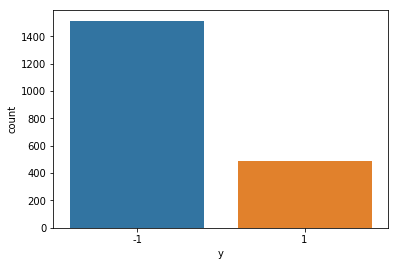

In [490]:
# Now lets check the class distributions

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

sns.countplot("y",data=data_train)

In [491]:
data_train['y'].value_counts()

-1    1513
 1     487
Name: y, dtype: int64

In [492]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = data_train[data_train.y==-1]
minority = data_train[data_train.y==1]

#Upsample Minority Class
minority_upsampled = resample (minority, replace = True, n_samples = 1513, random_state=123)


# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

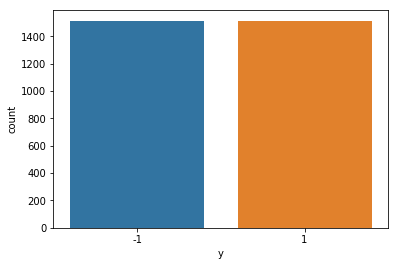

In [493]:
# Now lets check the class distributions

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

sns.countplot("y",data=upsampled)

In [494]:
upsampled['y'].value_counts()

 1    1513
-1    1513
Name: y, dtype: int64

## Data Assigning for Train Data 

In [495]:
# Assign Data 

xtrain = upsampled.iloc[:,:-1]
ytrain = upsampled.iloc[:,66]

#xtrain = xtrain.drop(['y'], axis = 1)

In [496]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66
127,25,0,0,1,0,7,9,14,24,81.7,...,0,0,0,0,0,0,1,3,0,0
1758,24,0,1,1,1,5,9,18,44,20.7,...,0,1,0,0,0,0,1,0,1,1
463,32,0,1,1,0,10,16,11,27,182.2,...,0,1,0,0,0,0,1,3,0,1
594,29,0,1,0,2,2,9,4,49,99.2,...,0,0,0,1,0,0,1,1,1,1
2051,35,1,1,0,0,7,11,18,35,59.2,...,0,0,0,1,0,0,0,2,2,1


In [497]:
ytrain.head()

127    -1
1758   -1
463    -1
594    -1
2051   -1
Name: y, dtype: int64

## Scaling of Train Data  

In [498]:
# Scaling the x values 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrainstd = scaler.transform(xtrain)


x_train = xtrainstd
y_train = ytrain

# Model  

## Base Random Forest  

In [223]:
from sklearn.ensemble import RandomForestClassifier


model1 = RandomForestClassifier(random_state=0)
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [224]:
# Predicting a new result
y_predtest = model1.predict(x_test)
y_predtrain = model1.predict(x_train)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predtest)
print(cm)

[[355  23]
 [ 67  55]]


In [225]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predtest)
accuracy_score(y_train,y_predtrain)


print ("The Training Accuracy is",accuracy_score(y_train,y_predtrain)*100,"%")
print ("The Test Accuracy is",accuracy_score(y_test,y_predtest)*100,"%")

The Training Accuracy is 99.93390614672836 %
The Test Accuracy is 82.0 %


## Selecting the range for the parameters for the grid search  

## Min Samples Leaf 

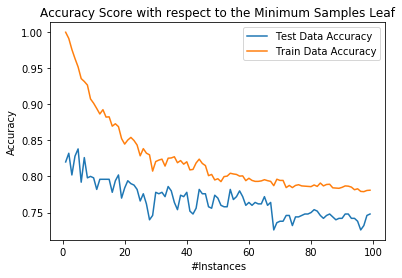

In [226]:
# Min Samples Leaf

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
acc_test = []
for i in range(1,100):
   
    model = RandomForestClassifier(random_state = 0,min_samples_leaf=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_test.append(accuracy_score(y_test,y_predtest))
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(1,100),acc_test,label='Test Data Accuracy')
ax0.plot(range(1,100),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to the Minimum Samples Leaf')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


From the Plot Between the Accuaracy and Instances of Min Samples Leaf, we see that As the instances increases, the Train data Accuracy decreases drastically within the first 25 instances. But the Test data accuracy decreases ina very slow pace. So we can choose a value between 1 and 20 for the Min Samples Leaf. 

## Max Depth  

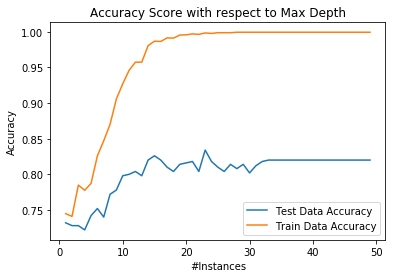

In [227]:
# Max Depth

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
acc_test = []
for i in range(1,50):
   
    model = RandomForestClassifier(random_state = 0,max_depth=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_test.append(accuracy_score(y_test,y_predtest))
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(1,50),acc_test,label='Test Data Accuracy')
ax0.plot(range(1,50),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to Max Depth')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()



We see that the as we increase the max depth, the accuracy of the both the test and train data increases, and eventually stabilizes after 30 instances. There seems to be a drastic change around 5 and 25 instances. So the range that could be selected for the max depth could be between 5 and 25.  

## Min Sample Split  

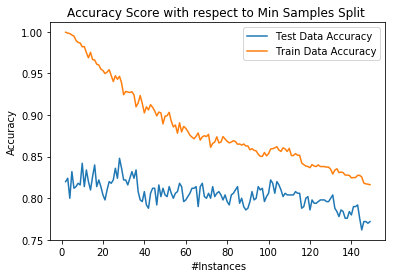

In [228]:
# Min Sample Split

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
acc_test = []
for i in range(2,150):
   
    model = RandomForestClassifier(random_state = 0,min_samples_split=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_test.append(accuracy_score(y_test,y_predtest))
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(2,150),acc_test,label='Test Data Accuracy')
ax0.plot(range(2,150),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to Min Samples Split ')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()



Choosing a Min Samples Split Between 2 and 40 would make sense because we see that the accuracy for the test is kind of constant. But the train accuracy keeps reducing at a constant pace. So choosing a vlaue between 2 and 25 would be reasonable. 

## Max Features 

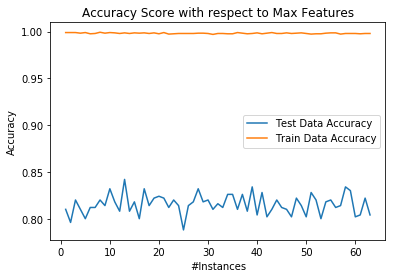

In [233]:
# Max Features 

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
acc_test = []
for i in range(1,64):
   
    model = RandomForestClassifier(random_state = 0,max_features=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_test.append(accuracy_score(y_test,y_predtest))
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(1,64),acc_test,label='Test Data Accuracy')
ax0.plot(range(1,64),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to Max Features')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()



The Train Accuracy is at a constant level and the test accuracy has a sharp increase beyond 10 parameters. So, we can choose the Max Features between 10 and 64. Because there is a maximum of 64 parameters. 

## Max Leaf Nodes 

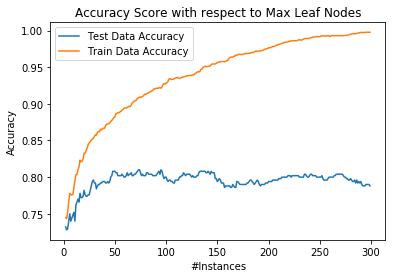

In [234]:
# Max Leaf Nodes

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
acc_test = []
for i in range(2,300):
   
    model = RandomForestClassifier(random_state = 0,max_leaf_nodes=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_test.append(accuracy_score(y_test,y_predtest))
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(2,300),acc_test,label='Test Data Accuracy')
ax0.plot(range(2,300),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to Max Leaf Nodes')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()



We can see that the Max Leaf Nodes have an high impact on the model. Beyond 150 instances, the Test Data Accuracy seems to drop. So, choosing a value between 50 and 150 would be reasonable

## Minimum Impurity Decrease 

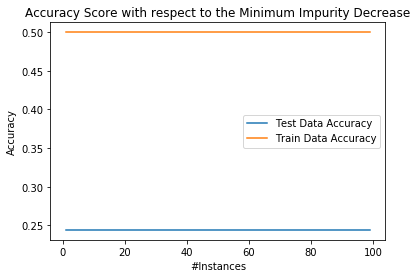

In [235]:
# Min Impurity Decrease

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
acc_test = []
for i in range(1,100):
   
    model = RandomForestClassifier(random_state = 0,min_impurity_decrease=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_test.append(accuracy_score(y_test,y_predtest))
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(1,100),acc_test,label='Test Data Accuracy')
ax0.plot(range(1,100),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to the Minimum Impurity Decrease')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()



Minimum Impurity Decrease do not have an effect on the Accuracy of the Models 

## n_estimators 

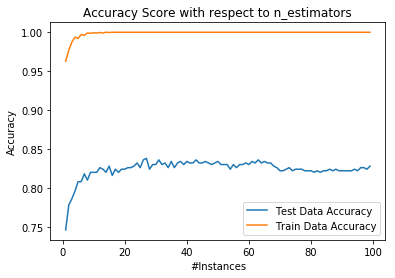

In [236]:
# n_estimators

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
acc_test = []
for i in range(1,100):
   
    model = RandomForestClassifier(random_state = 0,n_estimators=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_test.append(accuracy_score(y_test,y_predtest))
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(1,100),acc_test,label='Test Data Accuracy')
ax0.plot(range(1,100),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to n_estimators')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


We see that as the test accuracy increased until 40 instances and did stabilize after that. The Train Accuracy quickly reaches 100%. So choosing a value between 5 and 40 will be recommended. 

## n_jobs  

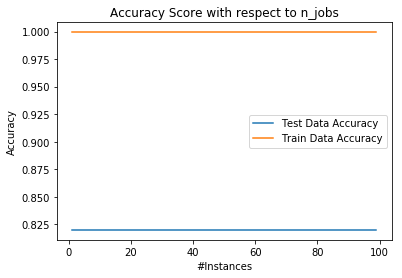

In [237]:
# n_jobs

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
acc_test = []
for i in range(1,100):
   
    model = RandomForestClassifier(random_state = 0,n_jobs=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_test.append(accuracy_score(y_test,y_predtest))
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(1,100),acc_test,label='Test Data Accuracy')
ax0.plot(range(1,100),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to n_jobs')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()



n_jobs doesn't have any effect on the Model Accuracy 

## Grid Search Based on the parameters selected 

### Gini 

In [517]:
model3 = RandomForestClassifier(criterion='gini',random_state=0)
model3.fit(x_train,y_train)

# Predicting a new result
y_predtest3 = model3.predict(x_test)
y_predtrain3 = model3.predict(x_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predtest3)
accuracy_score(y_train,y_predtrain3)


print ("The Training Accuracy is",accuracy_score(y_train,y_predtrain3)*100,"%")
print ("The Test Accuracy is",accuracy_score(y_test,y_predtest3)*100,"%")

The Training Accuracy is 99.93390614672836 %
The Test Accuracy is 82.0 %


In [518]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predtest3)
print(cm1)

cm2 = confusion_matrix(y_train, y_predtrain3)
print(cm2)

[[355  23]
 [ 67  55]]
[[1512    1]
 [   1 1512]]


## Grid Search Entropy 

In [388]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

best = RandomForestClassifier(random_state =0, criterion='gini')
best_grid = GridSearchCV(best,{ 'n_estimators': range(25,45,15),
                                'max_depth': np.arange(5,25,15),
                                'max_features':range(10,64,10),
                                'max_leaf_nodes':range(50,150,50)})


best_grid.fit(x_train, y_train)    
print('Best Parameters:{}'.format(best_grid.best_params_))
print(best_grid.best_params_)

Best Parameters:{'max_depth': 20, 'max_features': 50, 'max_leaf_nodes': 100, 'n_estimators': 40}
{'max_depth': 20, 'max_features': 50, 'max_leaf_nodes': 100, 'n_estimators': 40}


In [520]:
model3 = RandomForestClassifier(criterion='gini', n_estimators=40, min_samples_leaf= 1,min_samples_split=2,max_depth=20, max_leaf_nodes=100, random_state=0)
model3.fit(x_train,y_train)

# Predicting a new result
y_predtest3 = model3.predict(x_test)
y_predtrain3 = model3.predict(x_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predtest3)
accuracy_score(y_train,y_predtrain3)


print ("The Training Accuracy is",accuracy_score(y_train,y_predtrain3)*100,"%")
print ("The Test Accuracy is",accuracy_score(y_test,y_predtest3)*100,"%")

The Training Accuracy is 94.28288169200265 %
The Test Accuracy is 82.19999999999999 %


In [521]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predtest3)
print(cm1)

cm2 = confusion_matrix(y_train, y_predtrain3)
print(cm2)

[[325  53]
 [ 36  86]]
[[1391  122]
 [  51 1462]]


### Entropy 

In [244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

best = RandomForestClassifier(random_state =0, criterion='entropy')
best_grid = GridSearchCV(best,{ 'n_estimators': range(25,45,10),
                                'min_samples_split': range(2,40,13),
                                'max_depth': np.arange(5,25,10),
                                'max_features':range(10,64,10),
                                'min_samples_leaf': range(1,20,7),
                                'max_leaf_nodes':range(50,150,30)})


best_grid.fit(x_train, y_train)    
print('Best Parameters:{}'.format(best_grid.best_params_))
print(best_grid.best_params_)

Best Parameters:{'max_depth': 15, 'max_features': 30, 'max_leaf_nodes': 140, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 35}
{'max_depth': 15, 'max_features': 30, 'max_leaf_nodes': 140, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 35}


In [522]:
model4 = RandomForestClassifier(criterion='entropy', n_estimators=35, min_samples_leaf= 1,min_samples_split=2,max_depth=15, max_leaf_nodes=140, random_state=0)
model4.fit(x_train,y_train)

# Predicting a new result
y_predtest4 = model4.predict(x_test)
y_predtrain4 = model4.predict(x_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predtest4)
accuracy_score(y_train,y_predtrain4)


print ("The Training Accuracy is",accuracy_score(y_train,y_predtrain4)*100,"%")
print ("The Test Accuracy is",accuracy_score(y_test,y_predtest4)*100,"%")

The Training Accuracy is 96.00132187706544 %
The Test Accuracy is 82.8 %


In [523]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predtest4)
print(cm1)

cm2 = confusion_matrix(y_train, y_predtrain4)
print(cm2)

[[330  48]
 [ 38  84]]
[[1397  116]
 [   5 1508]]


It is obvious that an Entropy Criterion yields a better model than Gini Criterion. So an intense grid search based on the above prediction is performed. 

#### Better Entropy 1

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

best = RandomForestClassifier(random_state =0, criterion='entropy', min_samples_split=2, min_samples_leaf=1)
best_grid = GridSearchCV(best,{ 'n_estimators': range(25,45,5),
                                'max_depth': np.arange(5,25,5),
                                'max_features':range(10,79,5),
                                'max_leaf_nodes':range(75,150,10)})


best_grid.fit(x_train, y_train)    
print('Best Parameters:{}'.format(best_grid.best_params_))
print(best_grid.best_params_)

Best Parameters:{'max_depth': 20, 'max_features': 50, 'max_leaf_nodes': 145, 'n_estimators': 30}
{'max_depth': 20, 'max_features': 50, 'max_leaf_nodes': 145, 'n_estimators': 30}


In [525]:
model5 = RandomForestClassifier(criterion='entropy', max_features=50, n_estimators=30, min_samples_leaf= 1, min_samples_split=2,max_depth=20, max_leaf_nodes=145, random_state=0)
model5.fit(x_train,y_train)

# Predicting a new result
y_predtest5 = model5.predict(x_test)
y_predtrain5 = model5.predict(x_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predtest5)
accuracy_score(y_train,y_predtrain5)


print ("The Training Accuracy is",accuracy_score(y_train,y_predtrain5)*100,"%")
print ("The Test Accuracy is",accuracy_score(y_test,y_predtest5)*100,"%")

The Training Accuracy is 99.63648380700594 %
The Test Accuracy is 83.8 %


In [526]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predtest5)
print(cm1)

cm2 = confusion_matrix(y_train, y_predtrain5)
print(cm2)

[[347  31]
 [ 50  72]]
[[1504    9]
 [   2 1511]]


#### Better Entropy 2

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

best = RandomForestClassifier(random_state =0, criterion='entropy', min_samples_split=2, min_samples_leaf=1)
best_grid = GridSearchCV(best,{ 'n_estimators': range(25,45,3),
                                'max_depth': np.arange(5,25,3),
                                'max_features':range(10,64,3),
                                'max_leaf_nodes':range(100,150,5)})


best_grid.fit(x_train, y_train)    
print('Best Parameters:{}'.format(best_grid.best_params_))
print(best_grid.best_params_)

Best Parameters:{'max_depth': 23, 'max_features': 25, 'max_leaf_nodes': 145, 'n_estimators': 37}
{'max_depth': 23, 'max_features': 25, 'max_leaf_nodes': 145, 'n_estimators': 37}


In [527]:
model6 = RandomForestClassifier(criterion='entropy', n_estimators=40, max_features=30, min_samples_leaf= 4, min_samples_split=7,max_depth=20, max_leaf_nodes=150, random_state=0)
model6.fit(x_train,y_train)

# Predicting a new result
y_predtest6 = model6.predict(x_test)
y_predtrain6 = model6.predict(x_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predtest6)
accuracy_score(y_train,y_predtrain6)


print ("The Training Accuracy is",accuracy_score(y_train,y_predtrain6)*100,"%")
print ("The Test Accuracy is",accuracy_score(y_test,y_predtest6)*100,"%")

The Training Accuracy is 99.2729676140119 %
The Test Accuracy is 85.0 %


In [528]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predtest6)
print(cm1)

cm2 = confusion_matrix(y_train, y_predtrain6)
print(cm2)

[[343  35]
 [ 40  82]]
[[1496   17]
 [   5 1508]]


### The balanced error rate for the model (Best Entropy 2 - Model 6) is 20.97 

## Now we extrapolate the Random Forest to the entire training data 

## Fitting for the entire model  

## Load Train Data  

In [536]:
# Load Data 

maindata = pd.read_csv("train.csv")

maindata.shape

(2500, 67)

## Load Test Data  

In [537]:
# Load Data 

testdata = pd.read_csv("testbmi.csv")

testdata.shape

(1647, 66)

In [538]:
maindata.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,y
0,27,1,1,1,A,18,3,1,28,119.9,...,1,0,0,0,0,1,Mp,NPT,1,-1
1,30,0,1,1,B,18,13,3,19,86.7,...,1,0,0,0,0,0,Mm,NST,1,-1
2,37,0,1,1,A,1,3,14,33,174.0,...,1,0,0,0,0,0,Mp,NPT,0,1
3,29,0,1,1,C,14,9,3,29,8.8,...,0,0,0,0,0,0,Mp,NST,0,-1
4,33,1,1,0,E,2,15,12,39,55.0,...,1,0,0,0,0,0,Mm,NST,1,-1


In [539]:
testdata.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66
0,30,1,1,0,A,16,5,2,28,148.1,...,0,1,0,0,0,0,1,Mp,NPT,1
1,41,0,1,1,C,8,3,9,34,143.4,...,0,1,0,0,0,0,0,Ma,PT,1
2,24,0,1,0,E,5,1,6,27,199.2,...,0,0,0,0,0,0,1,Mp,ST,1
3,36,1,1,0,A,17,11,8,35,99.4,...,0,1,0,0,0,0,0,Mp,NPT,1
4,19,0,1,1,C,1,0,14,27,104.0,...,0,1,0,0,0,0,1,Ma,PT,1


## Class Distribution

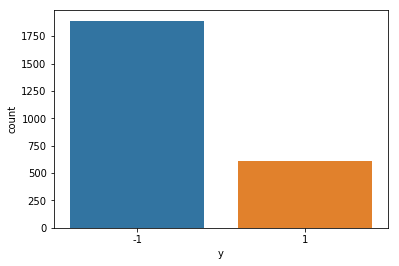

In [540]:
# Now lets check the class distributions

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

sns.countplot("y",data=maindata)

## Handling Categorical Variables  

In [541]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

maindata['x5'] = le.fit_transform(maindata['x5'])
maindata['x13'] = le.fit_transform(maindata['x13'])
maindata['x64'] = le.fit_transform(maindata['x64'])
maindata['x65'] = le.fit_transform(maindata['x65'])

maindata.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,y
0,27,1,1,1,0,18,3,1,28,119.9,...,1,0,0,0,0,1,3,0,1,-1
1,30,0,1,1,1,18,13,3,19,86.7,...,1,0,0,0,0,0,2,1,1,-1
2,37,0,1,1,0,1,3,14,33,174.0,...,1,0,0,0,0,0,3,0,0,1
3,29,0,1,1,2,14,9,3,29,8.8,...,0,0,0,0,0,0,3,1,0,-1
4,33,1,1,0,4,2,15,12,39,55.0,...,1,0,0,0,0,0,2,1,1,-1


In [542]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

testdata['x5'] = le.fit_transform(testdata['x5'])
testdata['x13'] = le.fit_transform(testdata['x13'])
testdata['x64'] = le.fit_transform(testdata['x64'])
testdata['x65'] = le.fit_transform(testdata['x65'])

testdata.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66
0,30,1,1,0,0,16,5,2,28,148.1,...,0,1,0,0,0,0,1,1,0,1
1,41,0,1,1,1,8,3,9,34,143.4,...,0,1,0,0,0,0,0,0,1,1
2,24,0,1,0,2,5,1,6,27,199.2,...,0,0,0,0,0,0,1,1,2,1
3,36,1,1,0,0,17,11,8,35,99.4,...,0,1,0,0,0,0,0,1,0,1
4,19,0,1,1,1,1,0,14,27,104.0,...,0,1,0,0,0,0,1,0,1,1


## Upsampling the Training data  

In [543]:
maindata['y'].value_counts()

-1    1891
 1     609
Name: y, dtype: int64

In [544]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = maindata[maindata.y==-1]
minority = maindata[maindata.y==1]

#Upsample Minority Class
minority_upsampled = resample (minority, replace = True, n_samples = 1891, random_state=123)


# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

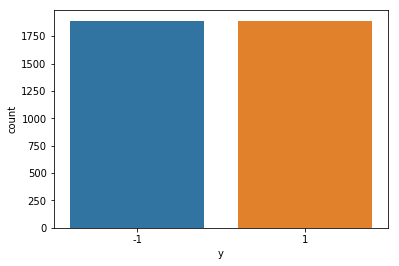

In [545]:
# Now lets check the class distributions

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

sns.countplot("y",data=upsampled)

In [546]:
upsampled['y'].value_counts()

 1    1891
-1    1891
Name: y, dtype: int64

# Assigning Data to test and Train

In [547]:
# Test Data
xtest = testdata.iloc[:,:]

#Train Data
xtrain = upsampled.iloc[:,:-1]
ytrain = upsampled.iloc[:,66]

## Scaling Data  

In [548]:
# Scaling the x values 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xtest)
xteststd = scaler.transform(xtest)


x_test = xteststd

In [549]:
# Scaling the x values 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrainstd = scaler.transform(xtrain)


x_train = xtrainstd
y_train = ytrain

## Model  

## Base Random Forest 

In [413]:
from sklearn.ensemble import RandomForestClassifier


model1 = RandomForestClassifier(random_state=0)
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [414]:
# Predicting a new result
y_predtest = model1.predict(x_test)
y_predtrain = model1.predict(x_train)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_predtrain)
print(cm)

from sklearn.metrics import accuracy_score

accuracy_score(y_train,y_predtrain)


print ("The Training Accuracy is",accuracy_score(y_train,y_predtrain)*100,"%")

[[1888    3]
 [   5 1886]]
The Training Accuracy is 99.78847170809095 %


## Selecting the range of parameters for grid search 

## Min Samples Leaf 

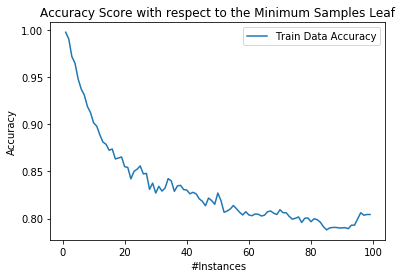

In [415]:
# Min Samples Leaf

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
for i in range(1,100):
   
    model = RandomForestClassifier(random_state = 0,min_samples_leaf=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(1,100),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to the Minimum Samples Leaf')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()

Choosing a value between 1 and 15 will make sense. We do not want to have high Train accuracy because it might overfit

# Max Depth 

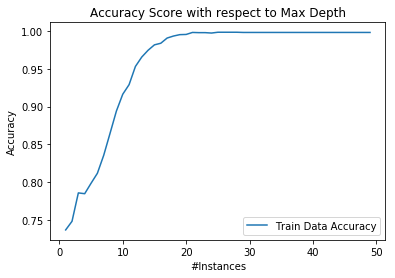

In [416]:
# Max Depth

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
for i in range(1,50):
   
    model = RandomForestClassifier(random_state = 0,max_depth=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_train.append(accuracy_score(y_train,y_predtrain))


ax0.plot(range(1,50),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to Max Depth')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()



Choosing a value between 5 and 15 will be reasonable

## Min Samples Split  

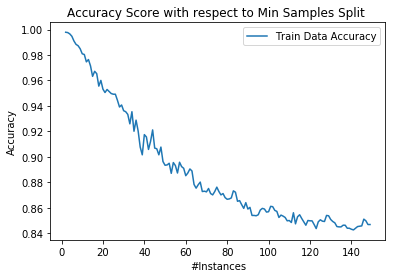

In [417]:
# Min Sample Split

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
for i in range(2,150):
   
    model = RandomForestClassifier(random_state = 0,min_samples_split=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_train.append(accuracy_score(y_train,y_predtrain))


ax0.plot(range(2,150),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to Min Samples Split ')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()




Choosing a value between 2 and 40 will be reasonable 

# Max Features 

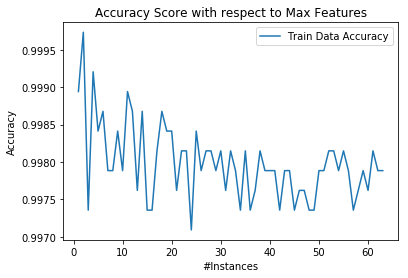

In [418]:
# Max Features 

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
for i in range(1,64):
   
    model = RandomForestClassifier(random_state = 0,max_features=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(1,64),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to Max Features')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


Choosing a value between 3 and 10 will be reasonable 

# Max Leaf Nodes

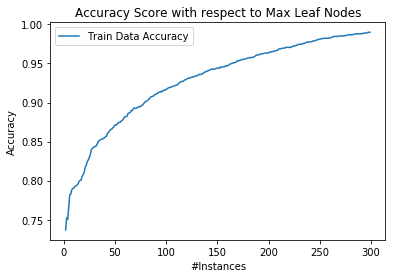

In [419]:
# Max Leaf Nodes

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
for i in range(2,300):
   
    model = RandomForestClassifier(random_state = 0,max_leaf_nodes=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(2,300),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to Max Leaf Nodes')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()




Having a value between 50 and 150 will be more reasonable 

## n_estimators 

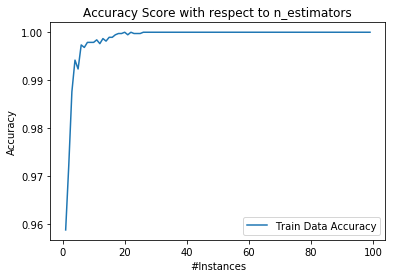

In [421]:
# n_estimators

from sklearn.ensemble import RandomForestClassifier

fig = plt.figure()
ax0 = fig.add_subplot(111) 
acc_train = []
for i in range(1,100):
   
    model = RandomForestClassifier(random_state = 0,n_estimators=i)
    model.fit(x_train,y_train)    
    y_predtest = model.predict(x_test)
    y_predtrain = model.predict(x_train)
    acc_train.append(accuracy_score(y_train,y_predtrain))

ax0.plot(range(1,100),acc_train,label='Train Data Accuracy')
ax0.legend()
ax0.set_title('Accuracy Score with respect to n_estimators')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()



Having a score between 5 amd 20 will make sense

# Grid Search Model 

## Gini 

In [423]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

best = RandomForestClassifier(random_state =0, criterion='gini')
best_grid = GridSearchCV(best,{ 'n_estimators': range(25,45,15),
                                'max_depth': np.arange(5,25,15),
                                'max_features':range(10,64,10),
                                'max_leaf_nodes':range(50,150,50)})


best_grid.fit(x_train, y_train)    
print('Best Parameters:{}'.format(best_grid.best_params_))
print(best_grid.best_params_)

Best Parameters:{'max_depth': 20, 'max_features': 40, 'max_leaf_nodes': 100, 'n_estimators': 40}
{'max_depth': 20, 'max_features': 40, 'max_leaf_nodes': 100, 'n_estimators': 40}


In [424]:
model3 = RandomForestClassifier(criterion='gini', n_estimators=40, min_samples_leaf= 1,min_samples_split=2,max_depth=20, max_leaf_nodes=100, random_state=0)
model3.fit(x_train,y_train)

# Predicting a new result
y_predtest3 = model3.predict(x_test)
y_predtrain3 = model3.predict(x_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_predtrain3)


print ("The Training Accuracy is",accuracy_score(y_train,y_predtrain3)*100,"%")

The Training Accuracy is 92.57006874669487 %


## Entropy 

In [425]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

best = RandomForestClassifier(random_state =0, criterion='entropy', min_samples_split=2, min_samples_leaf=1)
best_grid = GridSearchCV(best,{ 'n_estimators': range(25,45,5),
                                'max_depth': np.arange(5,25,5),
                                'max_features':range(10,64,5),
                                'max_leaf_nodes':range(100,150,10)})


best_grid.fit(x_train, y_train)    
print('Best Parameters:{}'.format(best_grid.best_params_))
print(best_grid.best_params_)

Best Parameters:{'max_depth': 20, 'max_features': 40, 'max_leaf_nodes': 140, 'n_estimators': 35}
{'max_depth': 20, 'max_features': 40, 'max_leaf_nodes': 140, 'n_estimators': 35}


In [426]:
model4 = RandomForestClassifier(criterion='entropy', n_estimators=35, min_samples_leaf= 1,min_samples_split=2,max_depth=20, max_leaf_nodes=140, random_state=0)
model4.fit(x_train,y_train)

# Predicting a new result
y_predtest4 = model4.predict(x_test)
y_predtrain4 = model4.predict(x_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_train,y_predtrain4)


print ("The Training Accuracy is",accuracy_score(y_train,y_predtrain4)*100,"%")

The Training Accuracy is 95.66367001586462 %


Now, based on the previous knowledge and the preliminiary grid search we fine tune the parameters to obtain a better result. 

## Best Model 


In [550]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(criterion='entropy', n_estimators=7, max_features=9, min_samples_leaf= 2, min_samples_split=3,max_depth=30, max_leaf_nodes=175, random_state=0)
model6.fit(x_train,y_train)

# Predicting a new result
y_predtest6 = model6.predict(x_test)
y_predtrain6 = model6.predict(x_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_train,y_predtrain6)


print ("The Training Accuracy is",accuracy_score(y_train,y_predtrain6)*100,"%")

The Training Accuracy is 95.42570068746696 %


## Confusion Matrix of the train data  

In [551]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_train, y_predtrain6)
print(cm2)

[[1756  135]
 [  38 1853]]


## Final Predicted Values 

In [429]:
y_predtest6

array([-1,  1, -1, ..., -1, -1, -1])

# Exporting Predicted Values to Excel 

In [552]:
import numpy as np
np.savetxt('iee520test.csv', y_predtest6, delimiter=',', fmt='%d')
y_predtest6 = np.loadtxt('iee520test.csv', delimiter=',')

# The FINAL Model Choosen is RANDOM FOREST with Upsampling of data. 

## The Parameters are  

•	Max Features – 9
•	N_Estimators – 7
•	Min Samples Leaf – 2
•	Min_Samples Split – 3
•	Max Depth – 30 
•	Max Leaf Nodes – 175
